# Projeto Final Ciência dos Dados

### Alunos:   
Victor Jurdi

Matheus Amaral

In [59]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from math import *
import numpy as np
from scipy.stats import norm, probplot
from scipy import stats
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import cluster, datasets
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

## Introdução

O objeivo deste projeto é analisar o dataset do jogo FIFA19, onde se encontra todos os atributos dos jogadores, e a partir desses e de técnicas de machine learining, como regressão e clusterização, prever o preço do jogador no mercado virtual.

O dataset foi extraido do link: https://www.kaggle.com/karangadiya/fifa19

## Leitura dos dados

In [60]:
dt = pd.read_csv("data.csv")

dt.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Limpando o arquivo (removendo as variáveis que não serão utilizadas nas análises)

In [68]:
dt1= dt.drop(columns=['Unnamed: 0','ID', 'Photo', 'Flag', 'Club Logo', 'Body Type', 'LS', 'ST', 'RS', 'LW', 'RW', 'LF', 'CF', 'RF', 'LAM', 'RAM', 'CAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']).fillna(0)
dt1.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [76]:
valor=[]
for e in dt1['Value']:
    if 'M' in e: 
        M=float(e.replace('M','')[1:])*1000000
        valor.append(M)
    elif 'K' in e:
        K=float(e.replace('K',"")[1:])*1000
        valor.append(K)
    else:
        E=float(e.replace('€',''))
        valor.append(E)

wage = []
for f in dt1['Wage']:
    if 'M' in f: 
        M=float(f.replace('M','')[1:])*1000000
        wage.append(M)
    elif 'K' in f:
        K=float(f.replace('K',"")[1:])*1000
        wage.append(K)
    else:
        E=float(f.replace('€',''))
        wage.append(E)
        
rc = []
for g in dt1['Wage']:
    if 'M' in g: 
        M=float(g.replace('M','')[1:])*1000000
        rc.append(M)
    elif 'K' in g:
        K=float(g.replace('K',"")[1:])*1000
        rc.append(K)
    else:
        E=float(g.replace('€',''))
        rc.append(E)

dt1['value'] = valor
dt1['wage'] = wage
dt1['release clause'] = rc
dt2 = dt1.drop(columns=['Value', 'Wage', 'Release Clause'])
dt2.head()

,Name,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,value,wage,release clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,2202,Left,5.0,4.0,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110500000.0,565000.0,565000.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,2228,Right,5.0,4.0,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77000000.0,405000.0,405000.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,2143,Right,5.0,5.0,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118500000.0,290000.0,290000.0
3,De Gea,27,Spain,91,93,Manchester United,1471,Right,4.0,3.0,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72000000.0,260000.0,260000.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,2281,Right,4.0,5.0,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102000000.0,355000.0,355000.0


Taxa de correlação:
0.6270852347261975


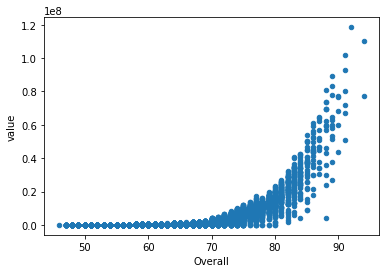

In [97]:
dt2.plot.scatter(x='Overall',y='value')
correlacao = dt2['Overall'].corr(dt2['value'])
print('Taxa de correlação:')
print(correlacao)

O preço de mercado dos jogadores aumenta exponecialmente conforme seu Overall, e a correlação entre estes é considerável, portanto podemos considerar esta análise.

Taxa de correlação:
0.649007182702698


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FD92694D30>,
      dtype=object)

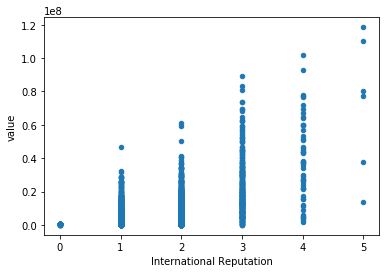

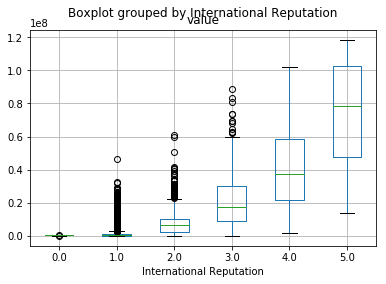

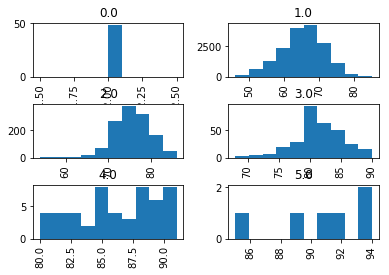

In [119]:
dt2.plot.scatter(x='International Reputation',y='value')
correlacao = dt2['International Reputation'].corr(dt2['value'])
print('Taxa de correlação:')
print(correlacao)
dt2.boxplot(column="value", by='International Reputation')
dt2.hist(column="Overall", by='International Reputation')

A partir dos gráficos acima, conclui-se que a reputação internacional dos jogadores é um fator importante para o preço deste visto que conforme aumenta o nível da reputação, os jogadores ficam tanto com Overall maior, quanto com preço maior.

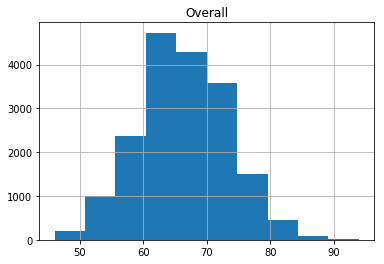

In [108]:
dt2.hist(column="Overall");

A maior parte dos jogadores estão entre 60 e 70 de Overall.

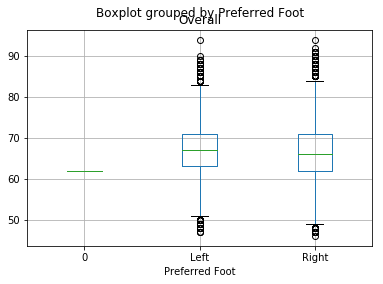

In [121]:
dt2.boxplot(column="Overall", by='Preferred Foot')

A mediana de Overall dos jogadores canhotos é levemente mais alta que dos jogadores destros, porém o valor máximo tirando outliers dos destros é maior.

Taxa de correlação:
0.07502220683279798


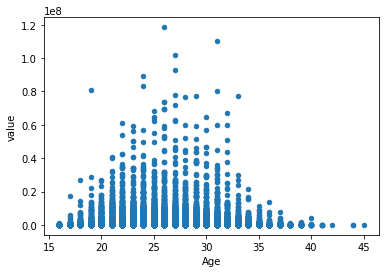

In [120]:
dt2.plot.scatter(x='Age',y='value')
correlacao = dt2['Age'].corr(dt2['value'])
print('Taxa de correlação:')
print(correlacao)

Jogadores com valor de mercado mais alto (outliers) estão na faixa dos 22 a 33 anos, porém como a taxa de correlação entre a idade dos jogadores e seu valor é baixa, indica que o valor do jogador independe de sua idade.

In [70]:
atributos = ['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
atr = dt2.loc[:, atributos]
atr.head()

,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [71]:
corr = atr.corr
corr

<bound method DataFrame.corr of        Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0          84.0       95.0             70.0          90.0     86.0       97.0   
1          84.0       94.0             89.0          81.0     87.0       88.0   
2          79.0       87.0             62.0          84.0     84.0       96.0   
3          17.0       13.0             21.0          50.0     13.0       18.0   
4          93.0       82.0             55.0          92.0     82.0       86.0   
5          81.0       84.0             61.0          89.0     80.0       95.0   
6          86.0       72.0             55.0          93.0     76.0       90.0   
7          77.0       93.0             77.0          82.0     88.0       87.0   
8          66.0       60.0             91.0          78.0     66.0       63.0   
9          13.0       11.0             15.0          29.0     13.0       12.0   
10         62.0       91.0             85.0          83.0     89.0       85.0